<img src="images/embeddings.jpg" width="800">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Word2vec-(Google):-news-model" data-toc-modified-id="Word2vec-(Google):-news-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Word2vec (Google): news model</a></span><ul class="toc-item"><li><span><a href="#Most-similar-words:" data-toc-modified-id="Most-similar-words:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Most similar words:</a></span></li><li><span><a href="#Combining-Words:" data-toc-modified-id="Combining-Words:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Combining Words:</a></span></li><li><span><a href="#Extracting-the-Odd-word:" data-toc-modified-id="Extracting-the-Odd-word:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Extracting the Odd word:</a></span></li><li><span><a href="#Finding-analogous-words:" data-toc-modified-id="Finding-analogous-words:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Finding analogous words:</a></span></li><li><span><a href="#t-SNE-visualizations:" data-toc-modified-id="t-SNE-visualizations:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>t-SNE visualizations:</a></span></li></ul></li><li><span><a href="#Creating-word2vec-from-your-own-text-data" data-toc-modified-id="Creating-word2vec-from-your-own-text-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating word2vec from your own text data</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Create-word2vec" data-toc-modified-id="Create-word2vec-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create word2vec</a></span></li><li><span><a href="#Exploring-the-model" data-toc-modified-id="Exploring-the-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring the model</a></span><ul class="toc-item"><li><span><a href="#Most-similar-word:" data-toc-modified-id="Most-similar-word:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Most similar word:</a></span></li><li><span><a href="#Odd-One-Out:" data-toc-modified-id="Odd-One-Out:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Odd-One-Out:</a></span></li><li><span><a href="#Finding-analogous-words:" data-toc-modified-id="Finding-analogous-words:-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Finding analogous words:</a></span></li></ul></li></ul></li><li><span><a href="#Simpsons" data-toc-modified-id="Simpsons-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simpsons</a></span><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Model-generation" data-toc-modified-id="Model-generation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model generation</a></span></li></ul></li><li><span><a href="#Glove" data-toc-modified-id="Glove-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Glove</a></span></li><li><span><a href="#FastText" data-toc-modified-id="FastText-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FastText</a></span></li></ul></div>

In [1]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

import nltk
from nltk.corpus import movie_reviews

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint

import pandas as pd

# ignore all warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Once downloaded the packages comment
#nltk.download()

#  Word2vec (Google): news model

In [3]:
# download google news vectors: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [4]:
from gensim.models.keyedvectors import KeyedVectors
gensim_model = KeyedVectors.load_word2vec_format(
    'data/Word2Vec/GoogleNews-vectors-negative300.bin', binary=True, limit=300000)

## Most similar words:

In [5]:
gensim_model.most_similar(positive=['January'])

[('February', 0.967593789100647),
 ('October', 0.9492780566215515),
 ('December', 0.9408604502677917),
 ('November', 0.9326644539833069),
 ('August', 0.9252052307128906),
 ('September', 0.9134545922279358),
 ('March', 0.8933349847793579),
 ('April', 0.8740777373313904),
 ('June', 0.8731662034988403),
 ('July', 0.8625510931015015)]

In [6]:
gensim_model.similarity('father','son')

0.8933086

## Combining Words:
Since our words are represented as an array of floats, we can add some together and lookup what their combination is.

In [7]:
gensim_model.most_similar(positive=['nature', 'science'])

[('biology', 0.5784977674484253),
 ('ecology', 0.5561812520027161),
 ('scientific', 0.5484973788261414),
 ('sciences', 0.5216706395149231),
 ('botany', 0.5139989852905273),
 ('physics', 0.4938763976097107),
 ('geography', 0.489334374666214),
 ('geology', 0.4885980486869812),
 ('mathematics', 0.4871952533721924),
 ('quantum_physics', 0.4866980314254761)]

## Extracting the Odd word:
Here, we ask our model to give us the word that does not belong to the list.

In [8]:
gensim_model.doesnt_match(['city', 'london', 'red'])

'red'

## Finding analogous words:
We can do math with the embedding vectors for words to find analogies between words.

king - man + woman = queen

Paris - France + Germany = Berlin

Tea - England + United_States = Coffee

North - South + West = East

In [9]:
gensim_model.most_similar(positive=['King', 'woman'], negative=['man'])

[('Queen', 0.5515626072883606),
 ('Princess', 0.4533674716949463),
 ('Queen_Elizabeth', 0.4327789545059204),
 ('queen', 0.4253097474575043),
 ('monarch', 0.41720181703567505),
 ('Empress', 0.4166426658630371),
 ('Spalding', 0.41134583950042725),
 ('reigning_monarch', 0.4030051827430725),
 ('Greene', 0.4013691842556),
 ('Jackson', 0.39542245864868164)]

In [10]:
gensim_model.most_similar(positive=['Paris', 'Germany'], negative=['France'])

[('Berlin', 0.7644002437591553),
 ('Frankfurt', 0.7329736948013306),
 ('Dusseldorf', 0.7009457349777222),
 ('Munich', 0.6773864030838013),
 ('Cologne', 0.6470193266868591),
 ('Düsseldorf', 0.6399551630020142),
 ('Stuttgart', 0.6361044645309448),
 ('Munich_Germany', 0.6238142251968384),
 ('Budapest', 0.6192865371704102),
 ('Hamburg', 0.6168562769889832)]

In [11]:
gensim_model.most_similar(
    positive=['Paris', 'Spain'], 
    negative=['France'])

[('Madrid', 0.7571903467178345),
 ('Barcelona', 0.6230698823928833),
 ('Seville', 0.5604878067970276),
 ('Buenos_Aires', 0.5557721853256226),
 ('Bilbao', 0.5505114793777466),
 ('Marrakesh', 0.5379421710968018),
 ('Valencia', 0.5292879343032837),
 ('Malaga', 0.5286388397216797),
 ('Málaga', 0.5119467973709106),
 ('Majorca', 0.5093432664871216)]

In [12]:
gensim_model.most_similar(positive=['Tea', 'United_States'], negative=['England'])

[('Coffee', 0.40512222051620483),
 ('Unites_States', 0.36414292454719543),
 ('tea', 0.3635876178741455),
 ('coffee', 0.3620995581150055),
 ('Teas', 0.3539789915084839),
 ('U.S.', 0.35077792406082153),
 ('Specialty_Coffee', 0.34735968708992004),
 ('teas', 0.3444087505340576),
 ('specialty_coffees', 0.3330366015434265),
 ('Untied_States', 0.3264850974082947)]

In [13]:
gensim_model.most_similar(positive=['North', 'West'], negative=['South'])

[('East', 0.6172999143600464),
 ('Central', 0.43742835521698),
 ('Hebron', 0.3680270314216614),
 ('Western', 0.36749526858329773),
 ('Northeast', 0.366566926240921),
 ('NORTH', 0.364694744348526),
 ('Northwest', 0.353318989276886),
 ('east', 0.3532946705818176),
 ('WEST', 0.349323570728302),
 ('FWL', 0.34146690368652344)]

## t-SNE visualizations:
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.

Here is a good tutorial on it: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, len(model.wv.__getitem__([word])[0])), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        if (wrd_score[0] not in list_names):
            wrd_vector = model.wv.__getitem__([wrd_score[0]])
            word_labels.append(wrd_score[0])
            color_list.append('blue')
            arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=13).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

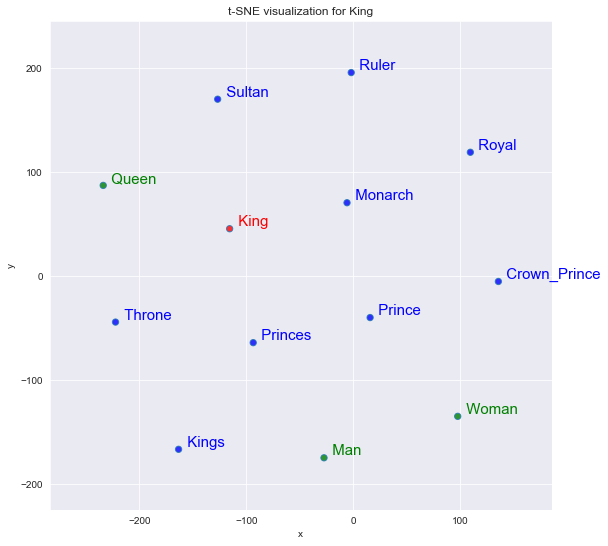

In [16]:
tsnescatterplot(gensim_model, 'king', ['man', 'woman', 'queen'])

In [17]:
gensim_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531)]

# Creating word2vec from your own text data

## Dataset
Movie reviews dataset

In [18]:
' '.join(movie_reviews.sents()[70])

'the characters and acting is nothing spectacular , sometimes even bordering on wooden .'

In [19]:
movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

## Create word2vec

The parameters:
   * **min_count** = int - Ignores all words with total absolute frequency lower than this - (2, 100)
   * **window** = int - The maximum distance between the current and predicted word within a sentence. E.g.window words on the left and window words on the left of our target - (2, 10)
   * **size** = int - Dimensionality of the feature vectors. - (50, 300)
   * **sample** = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
   * **alpha** = float - The initial learning rate - (0.01, 0.05)
   * **min_alpha** = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
   * **negative** = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
   * **workers** = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [20]:
model_movie = Word2Vec(min_count=10,
                       window=4,
                       size=300,
                       sample=6e-5, 
                       alpha=0.03, 
                       min_alpha=0.0007, 
                       negative=20,
                       workers=multiprocessing.cpu_count()-1)
model_movie.build_vocab(movie_reviews.sents())

In [21]:
model_movie = gensim.models.Word2Vec(movie_reviews.sents())

## Exploring the model
### Most similar word:
Here, we will ask our model to find the most similar words to the given ones according to the movie sentences with we have trained the model.

In [22]:
model_movie.most_similar('actor')

[('actress', 0.8865917921066284),
 ('oscar', 0.7927178740501404),
 ('performance', 0.790103554725647),
 ('villain', 0.7525976300239563),
 ('role', 0.7498910427093506),
 ('talented', 0.6860232353210449),
 ('award', 0.680846631526947),
 ('career', 0.6757906675338745),
 ('nomination', 0.6745494604110718),
 ('director', 0.6662296652793884)]

In [23]:
model_movie.most_similar('house')

[('hotel', 0.8660587072372437),
 ('wedding', 0.861059308052063),
 ('apartment', 0.8545748591423035),
 ('body', 0.852483332157135),
 ('country', 0.8501924276351929),
 ('station', 0.847441554069519),
 ('local', 0.8396389484405518),
 ('bar', 0.8390305638313293),
 ('company', 0.8387610912322998),
 ('party', 0.8383929133415222)]

In [24]:
model_movie.most_similar('comedy')

[('drama', 0.8547757863998413),
 ('thriller', 0.837548017501831),
 ('flick', 0.7724502086639404),
 ('picture', 0.7625644207000732),
 ('genre', 0.7360590696334839),
 ('entertainment', 0.735495924949646),
 ('piece', 0.7270241975784302),
 ('premise', 0.7259466648101807),
 ('concept', 0.7027179598808289),
 ('adventure', 0.69044429063797)]

Here, we will see how similar are two words to each other:

In [25]:
model_movie.similarity('thriller','genre')

0.7924944

In [26]:
model_movie.similarity('movie','film')

0.94489396

In [27]:
model_movie.similarity('theater','tree')

0.28958678

In [28]:
model_movie.most_similar(positive=['thriller', 'comedy'])

[('drama', 0.8877258896827698),
 ('flick', 0.8658602237701416),
 ('genre', 0.797344982624054),
 ('adventure', 0.792270839214325),
 ('picture', 0.7894028425216675),
 ('entertainment', 0.7574745416641235),
 ('piece', 0.7522749900817871),
 ('sci', 0.7392431497573853),
 ('concept', 0.7387115955352783),
 ('premise', 0.7366804480552673)]

### Odd-One-Out:
Here, we ask our model to give us the word that does not belong to the list!

Between actor, actress and runner who is the one that doesn't belong to the others?

In [29]:
model_movie.wv.doesnt_match(['actor', 'actress', 'runner'])

'runner'

### Finding analogous words:
Which word is to actor as men is to women?

In [30]:
model_movie.most_similar(positive=['actor', 'woman'], negative=['man'])

[('actress', 0.8765718340873718),
 ('oscar', 0.7806535959243774),
 ('performance', 0.7495431900024414),
 ('role', 0.7184998393058777),
 ('poor', 0.7074236869812012),
 ('talented', 0.6931906342506409),
 ('villain', 0.6930149793624878),
 ('award', 0.6860237717628479),
 ('attractive', 0.6788123846054077),
 ('janitor', 0.6782009601593018)]

<img src="images/simpsons.jpg" width="800">

# Simpsons

## Data loading

In [32]:
df_clean = pd.read_csv('data/simpsons_cleaned.csv')
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136961 entries, 0 to 136960
Data columns (total 2 columns):
Unnamed: 0    136961 non-null int64
clean         136961 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


,Unnamed: 0,clean
0,0,miss hoover actually little disease magazine n...
1,1,lisa simpson near tear mr bergstrom
2,2,miss hoover know sure like talk touch lesson p...
3,3,lisa simpson life worth live
4,4,edna krabappel flander poll open end recess so...


In [33]:
# Split each sentence into words
sent = [row.split() for row in df_clean['clean']]

## Model generation

In [34]:
model_simpsons = gensim.models.Word2Vec(sent)

In [35]:
model_simpsons.wv.most_similar(positive=["homer"])

[('grampa', 0.741596519947052),
 ('bart', 0.682362973690033),
 ('marge', 0.6511828899383545),
 ('homie', 0.6250184774398804),
 ('sweetie', 0.6154177784919739),
 ('honey', 0.5923716425895691),
 ('lisa', 0.570300817489624),
 ('maggie', 0.5569264888763428),
 ('mona', 0.5537084341049194),
 ('abe', 0.5533595681190491)]

In [36]:
model_simpsons.wv.most_similar(["marge"])

[('honey', 0.755206823348999),
 ('homie', 0.7283255457878113),
 ('sweetie', 0.691797137260437),
 ('maggie', 0.6801862716674805),
 ('mona', 0.6628449559211731),
 ('homer', 0.6511828899383545),
 ('sweetly', 0.6279177665710449),
 ('lisa', 0.6270251274108887),
 ('grampa', 0.6251136064529419),
 ('marriage', 0.6000243425369263)]

In [37]:
model_simpsons.wv.most_similar(positive=["bart"])

[('lisa', 0.8554328083992004),
 ('mom', 0.7041559815406799),
 ('homer', 0.682362973690033),
 ('lis', 0.6693547964096069),
 ('milhouse', 0.651136040687561),
 ('dad', 0.6486465334892273),
 ('grampa', 0.6039139032363892),
 ('cool', 0.5732205510139465),
 ('quit', 0.5728685855865479),
 ('devastating', 0.5637422800064087)]

In [38]:
model_simpsons.wv.similarity('maggie', 'baby')

0.6520385

In [39]:
model_simpsons.wv.similarity('bart', 'nelson')

0.45415154

In [40]:
model_simpsons.wv.doesnt_match(['jimbo', 'milhouse', 'kearney'])


'milhouse'

In [41]:
model_simpsons.wv.doesnt_match(['homer', 'patty', 'selma'])


'homer'

In [42]:
model_simpsons.wv.most_similar(positive=["man", "homer"], negative=["old"], topn=3)


[('grampa', 0.6526370048522949),
 ('marge', 0.6265760660171509),
 ('bart', 0.5434914827346802)]

In [43]:
model_simpsons.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)


[('lisa', 0.7851750254631042),
 ('maggie', 0.5999582409858704),
 ('homie', 0.5956891775131226)]

In [44]:
model_simpsons.wv.most_similar(positive=["homer", "woman"], negative=["man"], topn=3)


[('homie', 0.7161110043525696),
 ('marge', 0.6922812461853027),
 ('honey', 0.6260775923728943)]

# Glove

In [45]:
import numpy as np

In [46]:
la = np.linalg

In [47]:
import numpy as np
import pandas as pd

def create_cooccurrence_matrix(sentences, window_size=1):
    """Create co occurrence matrix from given list of sentences.

    Returns:
    - vocabs: dictionary of word counts
    - co_occ_matrix_sparse: sparse co occurrence matrix

    Example:
    ===========
    sentences = ['I love nlp',    'I love to learn',
                 'nlp is future', 'nlp is cool']

    vocabs,co_occ = create_cooccurrence_matrix(sentences)

    df_co_occ  = pd.DataFrame(co_occ.todense(),
                              index=voc.keys(),
                              columns = voc.keys())

    df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

    df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')

    """
    import scipy
    import nltk

    vocabulary = {}
    data = []
    row = []
    col = []

    tokenizer = nltk.tokenize.word_tokenize

    for sentence in sentences:
        sentence = sentence.strip()
        tokens = [token for token in tokenizer(sentence) if token != u""]
        for pos, token in enumerate(tokens):
            i = vocabulary.setdefault(token, len(vocabulary))
            start = max(0, pos-window_size)
            end = min(len(tokens), pos+window_size+1)
            for pos2 in range(start, end):
                if pos2 == pos:
                    continue
                j = vocabulary.setdefault(tokens[pos2], len(vocabulary))
                data.append(1.)
                row.append(i)
                col.append(j)

    cooccurrence_matrix_sparse = scipy.sparse.coo_matrix((data, (row, col)))
    return vocabulary, cooccurrence_matrix_sparse

In [48]:
sentences = ['I like deep learning', 'I like NLP', 'I enjoy flying']

In [49]:
voc, co_occ = create_cooccurrence_matrix(sentences)

df_co_occ  = pd.DataFrame(co_occ.todense(),
                          index=voc.keys(),
                          columns = voc.keys())

X = df_co_occ.to_numpy()
df_co_occ
#df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

,I,like,deep,learning,NLP,enjoy,flying
I,0.0,2.0,0.0,0.0,0.0,1.0,0.0
like,2.0,0.0,1.0,0.0,1.0,0.0,0.0
deep,0.0,1.0,0.0,1.0,0.0,0.0,0.0
learning,0.0,0.0,1.0,0.0,0.0,0.0,0.0
NLP,0.0,1.0,0.0,0.0,0.0,0.0,0.0
enjoy,1.0,0.0,0.0,0.0,0.0,0.0,1.0
flying,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
U, s, Vh = la.svd(X, full_matrices = False)
U

array([[ 0.        ,  0.83405726, -0.        ,  0.28541038,  0.17392303,
        -0.16116302, -0.40824829],
       [-0.91675668,  0.        , -0.23180398, -0.        ,  0.22110659,
         0.23861261,  0.        ],
       [ 0.        ,  0.40533547,  0.00000001, -0.65309526, -0.46919443,
         0.43477158, -0.        ],
       [-0.15351016,  0.        , -0.54739786, -0.00000001, -0.55916043,
        -0.60343171, -0.        ],
       [ 0.        ,  0.34719752,  0.        , -0.19428866,  0.30688006,
        -0.28436554,  0.81649658],
       [-0.36877068,  0.        ,  0.80412841,  0.00000001, -0.31690192,
        -0.34199248, -0.        ],
       [ 0.        ,  0.13966221, -0.00000001,  0.6739877 , -0.43983708,
         0.40756806,  0.40824829]])

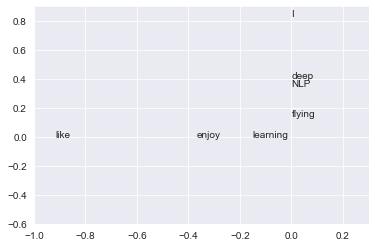

In [51]:
plt.axis([-1, 0.3, -0.6, 0.9])
for i in range(len(df_co_occ.columns)):
    plt.text(U[i, 0], U[i, 1], df_co_occ.columns[i])

# FastText

In [52]:
from gensim.models import FastText

The parameters:

   * **sentences (iterable of list of str, optional)** – Can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network. See BrownCorpus, Text8Corpus or LineSentence in word2vec module for such examples. If you don’t supply sentences, the model is left uninitialized – use if you plan to initialize it in some other way.
   * **size (int, optional)** – Dimensionality of the word vectors.
   * **window (int, optional)** – The maximum distance between the current and predicted word within a sentence.
   * **min_count (int, optional)** – The model ignores all words with total frequency lower than this.
   * **workers (int, optional)** – Use these many worker threads to train the model (=faster training with multicore machines).
   * **min_n (int, optional)** – Minimum length of char n-grams to be used for training word representations.
   * **max_n (int, optional)** – Max length of char ngrams to be used for training word representations. Set max_n to be lesser than min_n to avoid char ngrams being used.

In [53]:
ft_model = FastText(sentences=movie_reviews.sents(), size=100, window=5, min_count=150, workers=4, min_n=3, max_n=10)

In [54]:
model_movie.most_similar('actor')

[('actress', 0.8865917921066284),
 ('oscar', 0.7927178740501404),
 ('performance', 0.790103554725647),
 ('villain', 0.7525976300239563),
 ('role', 0.7498910427093506),
 ('talented', 0.6860232353210449),
 ('award', 0.680846631526947),
 ('career', 0.6757906675338745),
 ('nomination', 0.6745494604110718),
 ('director', 0.6662296652793884)]

In [55]:
ft_model.wv.most_similar('actor')

[('actress', 0.8060824871063232),
 ('talented', 0.7182985544204712),
 ('actors', 0.7065329551696777),
 ('act', 0.6896833181381226),
 ('talent', 0.6867105960845947),
 ('oscar', 0.6824277639389038),
 ('director', 0.6700352430343628),
 ('performance', 0.6690415143966675),
 ('villain', 0.661266565322876),
 ('cast', 0.6172805428504944)]

In [56]:
ft_model.wv.most_similar('actooooor')

[('actor', 0.7136484384536743),
 ('actress', 0.6678662300109863),
 ('poor', 0.6069299578666687),
 ('acting', 0.5992627739906311),
 ('talented', 0.577966570854187),
 ('talent', 0.5401546955108643),
 ('excellent', 0.5373172760009766),
 ('oscar', 0.5317933559417725),
 ('playing', 0.53121018409729),
 ('supporting', 0.5211615562438965)]

In [57]:
model_movie.most_similar('actooooor')

KeyError: "word 'actooooor' not in vocabulary"

As you can observe with fasttext actooor has found the most similar vector, but word2vec hasn't because it wasn't trained with that word.